In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('sales_full_data.csv') # Reading the csv file
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [74]:
df.isnull().sum()   #taking note of the Nan values in the csv file

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [75]:

df1 = df.dropna()   # droping off the Nan values
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [76]:
df1.shape   #keeping an eye on the shape

(186305, 6)

In [77]:
def month(df):
    if '-' in df:
        df = df.replace('-','/')
        return df
    return df
df1['Order Date'] = df1['Order Date'].apply(month)      # Changing the altered format of dates ie dd-mm-yyyy to dd/mm/yyyy
df1.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [78]:
def month_count(df):
    if df != 'Order Date':
        return int(df.split('/')[0])
df1['Month'] = df1['Order Date'].apply(month_count)     #Creating a column month so as to know the month specifically
df2 = df1.dropna()
df2.Month.unique()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([ 4.,  5.,  8.,  9., 12.,  1.,  2.,  3.,  7.,  6., 11., 10.])

In [79]:
df2['Quantity Ordered'] = df2['Quantity Ordered'].apply(lambda x: int(x))   #Type cast the data of Quantity Ordered and Price Each to intiger
df2['Price Each'] = df2['Price Each'].apply(lambda x: float(x))


D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
df2['Total Price'] = df2['Quantity Ordered']*df2['Price Each']      #Getting the total sale of a product at a perticular time

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df2.shape       # Re - Checking the shape 

(185950, 8)

In [82]:
sales = {}
for key,dataf in df2.groupby('Month'):
    sales[key] = dataf['Total Price'].sum()         # Adding the sales of each month up and storing it in a dict for proper visualization 
print(sales) 
print()
print(max(sales))
print(min(sales))
    

{1.0: 1822256.73, 2.0: 2202022.42, 3.0: 2807100.38, 4.0: 3390670.2399999993, 5.0: 3152606.7499999995, 6.0: 2577802.26, 7.0: 2647775.76, 8.0: 2244467.88, 9.0: 2097560.13, 10.0: 3736726.8799999994, 11.0: 3199603.1999999997, 12.0: 4613443.34}

12.0
1.0


Text(0.5, 1.0, 'Sales per month')

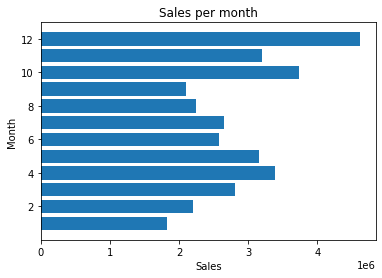

In [83]:
plt.barh(list(sales.keys()),list(sales.values()))
plt.xlabel('Sales')
plt.ylabel('Month')
plt.title('Sales per month')